In [ ]:
pip install chart_studio

In [2]:
pip install cufflinks


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=1b8fe54de8fd11c6e57b05197741dd51abf7e578b37b57486e0efba04e15eee2
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [277]:
import numpy as np
import pandas as pd
import matplotlib as plt

#from chart_studio.plotly import plot, iplot
#import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [278]:
df = pd.read_excel('Data_Train.xlsx')

In [279]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
import pandas_profiling as pf

In [8]:
pf.ProfileReport(df)

In [12]:
df.shape

(10683, 11)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [280]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [281]:
df.dropna(how='any', inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [282]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [283]:
#Let's convert Date_of_Journey to its appropriate format as datetime with regards to day and month
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['day_of_Journey']=(df['Date_of_Journey']).dt.day
df['month_of_Journey']=(df['Date_of_Journey']).dt.month

In [284]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [285]:
# #we can now drop the Date_of_journey
df.drop(['Date_of_Journey'], axis=1, inplace=True)

Dep_Time

In [286]:
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [287]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [288]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


Arrival_Timem

In [289]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [290]:
#drop Arrival_Time
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [291]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


Duration

In [292]:
#split duration datapoints dased on space
duration = df['Duration'].str.split(' ', expand=True)
#fill nan values with 00m
duration[1].fillna('00m', inplace=True)
# select item from 0th index and leave last  in this case h
df['duration_hr']=duration[0].apply(lambda x: x[:-1])
# select item from 1st index and leave last  in this case m
df['duration_min']=duration[1].apply(lambda x: x[:-1])



In [293]:
df.drop(['Duration'], axis=1, inplace=True)

In [294]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [295]:
#cf.set_config_file(theme='ggplot',sharing='public',offline=True)

Count of Airlines

In [296]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Airline vs Price

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Airline'>

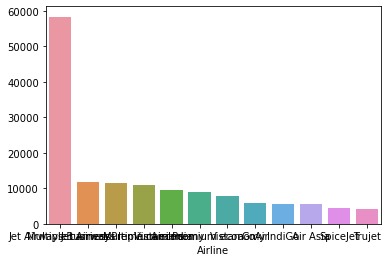

In [297]:
Airprice = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure.Figure(figsize=(15,10))
sns.barplot(Airprice.index, Airprice.values)


<AxesSubplot:xlabel='Airline', ylabel='Price'>

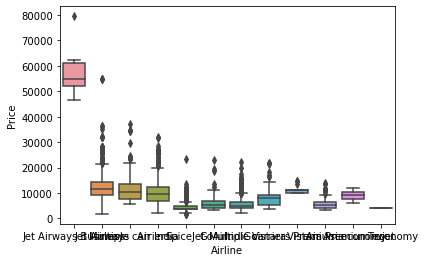

In [298]:
plt.figure.Figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline', data=df.sort_values('Price', ascending=False))

Price based on number of stoppages

In [299]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

<module 'matplotlib' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

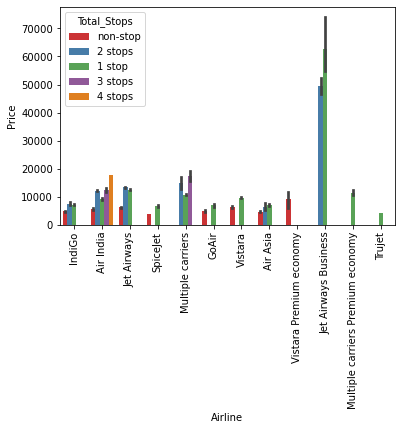

In [300]:
plt.figure.Figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt

Jet Airways Business is having the highest price

In [301]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Source vs Price

<module 'matplotlib' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

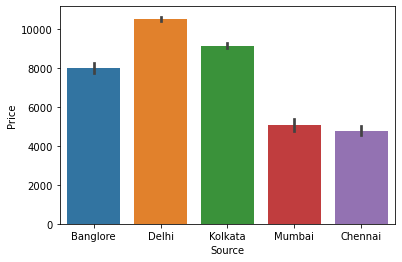

In [302]:
plt.figure.Figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt

Destination vs Price

<module 'matplotlib' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

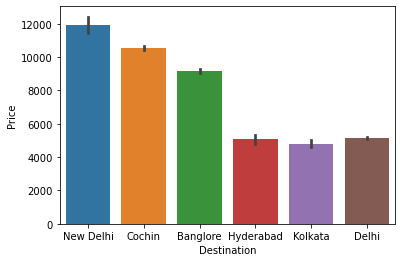

In [303]:
plt.figure.Figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt

In [93]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [304]:
for i in df:
    df.replace('New Delhi', 'Delhi', inplace=True)

In [305]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<module 'matplotlib' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

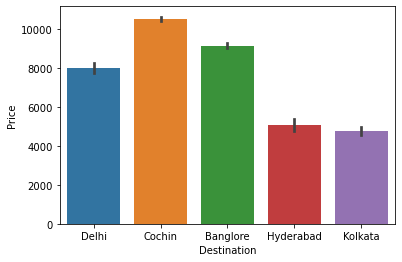

In [306]:
plt.figure.Figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt

<AxesSubplot:>

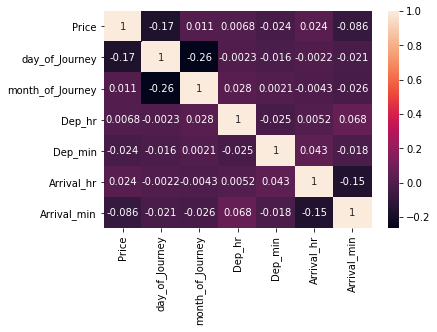

In [307]:
sns.heatmap(df.corr(),annot=True)


Onehot Encoding on the categorical variables

In [308]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [309]:
# Handling categorival variables
df['Total_Stops']= df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [310]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25


In [311]:
air_ec=pd.get_dummies(df['Airline'], drop_first=True)
source_dest_ec=pd.get_dummies(df[['Source', 'Destination']], drop_first=True)
df=pd.concat([air_ec,source_dest_ec,df], axis=1)

In [312]:
df.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25


In [313]:
df.drop(['Airline', 'Source', 'Destination'], inplace=True, axis=1)

In [314]:
df.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25


In [315]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'day_of_Journey',
       'month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [316]:
df.shape

(10682, 31)

### For Test data

In [317]:
df_test=pd.read_excel("Test_set.xlsx")

In [318]:
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [319]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month
#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
#Splitting duration  time
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])
#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)
#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non­stop':0, '2 stops':2, '1 stop':1, '3 stops':3,
'4 stops':4})
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [320]:
df_test.drop(['Airline','Source','Destination','Additional_Info','Route'],inplace=True,axis=1)

In [321]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [322]:
df.head(1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50


In [323]:
X = df.drop(['Route', 'Additional_Info','Price'], axis=1)
y = df['Price']

## Model Building

Feature Importance using Extra Trees

In [324]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model = ExtraTreesRegressor()
ET_model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

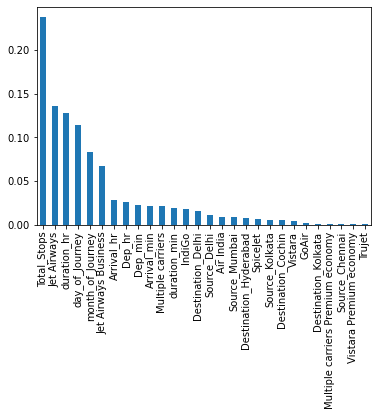

In [325]:
pd.Series(ET_model.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar')

In [326]:
# spliting the data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [327]:
#ETR model
ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(X_train, y_train)
train_pred = ET_model.predict(X_train)
y_predict = ET_model.predict(X_test)

In [328]:
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_predict))


In [329]:
print('Train Accuracy: ', r2_score(y_train, train_pred))
print('Test Accuracy: ', r2_score(y_test, y_predict))


Train Accuracy:  0.969466853317013
Test Accuracy:  0.7675286183072724


In [330]:
from sklearn.ensemble import RandomForestRegressor

In [331]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
x_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

In [332]:
print('Train Accuracy: ', r2_score(y_train, x_pred))
print('Test Accuracy: ', r2_score(y_test, y_pred))

Train Accuracy:  0.9529624391929947
Test Accuracy:  0.7945125039992946


In [333]:
from sklearn.model_selection import RandomizedSearchCV

In [334]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# random grid
rand_grid = {'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

rf=RandomForestRegressor()
rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)


In [335]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error')

In [336]:
rf1_pred=rCV.predict(X_train)
rf_pred=rCV.predict(X_test)
rf_pred

array([12658.24395775,  4263.96823401,  6103.74287218, ...,
       11473.58191111,  9806.59417014,  8725.09771078])

In [337]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1170.4548085062959
MSE 4018766.469472697


In [338]:
print('Train Accuracy: ', r2_score(y_train, rf1_pred))
print('Test Accuracy: ', r2_score(y_test, rf_pred))

Train Accuracy:  0.8940463093095612
Test Accuracy:  0.8042841145026361


In [339]:
from catboost import CatBoostRegressor

In [340]:
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 6.03ms	remaining: 6.02s
1:	learn: 4319.1952920	total: 12ms	remaining: 6s
2:	learn: 4170.0874200	total: 18.4ms	remaining: 6.11s
3:	learn: 4033.1061207	total: 24.5ms	remaining: 6.09s
4:	learn: 3909.5332929	total: 30.5ms	remaining: 6.07s
5:	learn: 3788.8771850	total: 38.4ms	remaining: 6.35s
6:	learn: 3677.5795256	total: 44.5ms	remaining: 6.32s
7:	learn: 3585.9715553	total: 50.3ms	remaining: 6.23s
8:	learn: 3499.6424958	total: 56.7ms	remaining: 6.25s
9:	learn: 3408.9602975	total: 62.5ms	remaining: 6.19s
10:	learn: 3329.4018172	total: 68.4ms	remaining: 6.15s
11:	learn: 3258.4306577	total: 87.4ms	remaining: 7.19s
12:	learn: 3188.9732731	total: 96.5ms	remaining: 7.33s
13:	learn: 3126.6519374	total: 102ms	remaining: 7.17s
14:	learn: 3064.8092738	total: 107ms	remaining: 7.01s
15:	learn: 3011.9738031	total: 112ms	remaining: 6.88s
16:	learn: 2960.0953295	total: 118ms	remaining: 6.84s
17:	learn: 2917.5532184	total: 125ms	remaining: 6.8s
18

171:	learn: 1925.4669384	total: 985ms	remaining: 4.74s
172:	learn: 1924.3200339	total: 991ms	remaining: 4.74s
173:	learn: 1922.7154464	total: 997ms	remaining: 4.73s
174:	learn: 1920.9589969	total: 1s	remaining: 4.73s
175:	learn: 1919.1457003	total: 1.01s	remaining: 4.72s
176:	learn: 1918.1069516	total: 1.01s	remaining: 4.71s
177:	learn: 1916.2214512	total: 1.02s	remaining: 4.71s
178:	learn: 1913.5124519	total: 1.03s	remaining: 4.71s
179:	learn: 1911.4800432	total: 1.03s	remaining: 4.71s
180:	learn: 1909.3957573	total: 1.04s	remaining: 4.7s
181:	learn: 1908.4135607	total: 1.04s	remaining: 4.68s
182:	learn: 1906.5491885	total: 1.05s	remaining: 4.68s
183:	learn: 1904.6147159	total: 1.05s	remaining: 4.67s
184:	learn: 1903.7135890	total: 1.06s	remaining: 4.66s
185:	learn: 1902.4011221	total: 1.06s	remaining: 4.66s
186:	learn: 1901.0717891	total: 1.07s	remaining: 4.65s
187:	learn: 1899.6407868	total: 1.07s	remaining: 4.64s
188:	learn: 1898.5577875	total: 1.08s	remaining: 4.63s
189:	learn: 18

334:	learn: 1731.4241971	total: 1.8s	remaining: 3.58s
335:	learn: 1729.9668045	total: 1.81s	remaining: 3.57s
336:	learn: 1729.1779869	total: 1.81s	remaining: 3.57s
337:	learn: 1729.0852102	total: 1.82s	remaining: 3.56s
338:	learn: 1728.1482089	total: 1.82s	remaining: 3.56s
339:	learn: 1726.7783890	total: 1.83s	remaining: 3.55s
340:	learn: 1726.2547590	total: 1.83s	remaining: 3.55s
341:	learn: 1724.9434243	total: 1.84s	remaining: 3.54s
342:	learn: 1724.9309222	total: 1.85s	remaining: 3.54s
343:	learn: 1723.3258449	total: 1.85s	remaining: 3.53s
344:	learn: 1722.4287769	total: 1.86s	remaining: 3.52s
345:	learn: 1721.3414872	total: 1.86s	remaining: 3.52s
346:	learn: 1720.2014300	total: 1.86s	remaining: 3.51s
347:	learn: 1719.6390060	total: 1.87s	remaining: 3.5s
348:	learn: 1718.3140866	total: 1.87s	remaining: 3.5s
349:	learn: 1717.3394270	total: 1.88s	remaining: 3.49s
350:	learn: 1716.4750581	total: 1.88s	remaining: 3.48s
351:	learn: 1714.7302070	total: 1.89s	remaining: 3.48s
352:	learn: 1

498:	learn: 1606.8248170	total: 2.62s	remaining: 2.63s
499:	learn: 1606.2762544	total: 2.63s	remaining: 2.63s
500:	learn: 1605.7741311	total: 2.63s	remaining: 2.62s
501:	learn: 1604.7832547	total: 2.64s	remaining: 2.62s
502:	learn: 1604.0246624	total: 2.64s	remaining: 2.61s
503:	learn: 1603.4539587	total: 2.65s	remaining: 2.61s
504:	learn: 1602.6018182	total: 2.66s	remaining: 2.6s
505:	learn: 1601.9053810	total: 2.66s	remaining: 2.6s
506:	learn: 1601.7180851	total: 2.67s	remaining: 2.6s
507:	learn: 1601.1230396	total: 2.67s	remaining: 2.59s
508:	learn: 1601.0062587	total: 2.68s	remaining: 2.58s
509:	learn: 1600.4310960	total: 2.68s	remaining: 2.58s
510:	learn: 1600.0121639	total: 2.69s	remaining: 2.57s
511:	learn: 1598.7379098	total: 2.69s	remaining: 2.57s
512:	learn: 1597.8127483	total: 2.7s	remaining: 2.56s
513:	learn: 1597.8080633	total: 2.7s	remaining: 2.56s
514:	learn: 1597.1631563	total: 2.71s	remaining: 2.55s
515:	learn: 1596.1793943	total: 2.71s	remaining: 2.54s
516:	learn: 159

662:	learn: 1513.6007305	total: 3.44s	remaining: 1.75s
663:	learn: 1513.0918781	total: 3.44s	remaining: 1.74s
664:	learn: 1512.7977061	total: 3.45s	remaining: 1.74s
665:	learn: 1512.4112519	total: 3.45s	remaining: 1.73s
666:	learn: 1512.1090491	total: 3.46s	remaining: 1.73s
667:	learn: 1511.3236721	total: 3.47s	remaining: 1.72s
668:	learn: 1510.6262787	total: 3.47s	remaining: 1.72s
669:	learn: 1510.6236099	total: 3.48s	remaining: 1.71s
670:	learn: 1509.8371387	total: 3.48s	remaining: 1.71s
671:	learn: 1509.2874087	total: 3.49s	remaining: 1.7s
672:	learn: 1509.2834648	total: 3.49s	remaining: 1.7s
673:	learn: 1509.2783078	total: 3.49s	remaining: 1.69s
674:	learn: 1508.6425759	total: 3.5s	remaining: 1.69s
675:	learn: 1507.9908505	total: 3.51s	remaining: 1.68s
676:	learn: 1507.4353868	total: 3.51s	remaining: 1.68s
677:	learn: 1506.6989363	total: 3.52s	remaining: 1.67s
678:	learn: 1506.1226434	total: 3.52s	remaining: 1.67s
679:	learn: 1505.6428927	total: 3.53s	remaining: 1.66s
680:	learn: 1

827:	learn: 1448.0131327	total: 4.26s	remaining: 885ms
828:	learn: 1447.7913809	total: 4.26s	remaining: 880ms
829:	learn: 1447.2632152	total: 4.27s	remaining: 875ms
830:	learn: 1446.9918422	total: 4.28s	remaining: 870ms
831:	learn: 1446.7329213	total: 4.28s	remaining: 865ms
832:	learn: 1446.4104391	total: 4.29s	remaining: 860ms
833:	learn: 1445.9325543	total: 4.29s	remaining: 855ms
834:	learn: 1445.7856855	total: 4.3s	remaining: 850ms
835:	learn: 1445.5632822	total: 4.3s	remaining: 845ms
836:	learn: 1445.4024114	total: 4.31s	remaining: 839ms
837:	learn: 1444.9772217	total: 4.32s	remaining: 834ms
838:	learn: 1444.9731111	total: 4.32s	remaining: 829ms
839:	learn: 1444.6856308	total: 4.32s	remaining: 824ms
840:	learn: 1444.6836141	total: 4.33s	remaining: 818ms
841:	learn: 1444.2557845	total: 4.33s	remaining: 813ms
842:	learn: 1443.9635568	total: 4.34s	remaining: 808ms
843:	learn: 1443.5793488	total: 4.34s	remaining: 803ms
844:	learn: 1443.2765572	total: 4.35s	remaining: 798ms
845:	learn: 

992:	learn: 1397.2668980	total: 5.08s	remaining: 35.8ms
993:	learn: 1397.1235980	total: 5.08s	remaining: 30.7ms
994:	learn: 1396.9517827	total: 5.09s	remaining: 25.6ms
995:	learn: 1396.6956847	total: 5.1s	remaining: 20.5ms
996:	learn: 1396.4053953	total: 5.1s	remaining: 15.4ms
997:	learn: 1395.9340121	total: 5.11s	remaining: 10.2ms
998:	learn: 1395.8518997	total: 5.11s	remaining: 5.12ms
999:	learn: 1395.7331331	total: 5.12s	remaining: 0us


In [341]:
cat_train = cat.predict(X_train)
cat_pred=cat.predict(X_test)

In [342]:
print('Train Accuracy: ', r2_score(y_train, cat_train))
print('Test Accuracy: ', r2_score(y_test, cat_pred))

Train Accuracy:  0.9091493167289316
Test Accuracy:  0.8301928561140887


In [266]:
!pip install lightgbm

In [343]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [344]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [345]:
lgb_train=lgb_model.predict(X_train)

lgb_pred=lgb_model.predict(X_test)


In [346]:
print('Train Accuracy: ', r2_score(y_train, lgb_train))
print('Test Accuracy: ', r2_score(y_test, lgb_pred))

Train Accuracy:  0.8689036231448327
Test Accuracy:  0.8030064936005559


In [347]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_train=xgb_model.predict(X_train)
xgb_pred=xgb_model.predict(X_test)


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [348]:
print('Train Accuracy: ', r2_score(y_train, xgb_train))
print('Test Accuracy: ', r2_score(y_test, xgb_pred))

Train Accuracy:  0.9353720803083074
Test Accuracy:  0.8212496825906317


In [349]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [350]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'day_of_Journey',
       'month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [351]:
deploy_df = df.drop(['Route','Additional_Info'], axis=1)

In [353]:
deploy_df.to_csv('flight_deploy_df')

In [355]:
import pickle
pickle.dump(cat, open('model.pkl', 'wb'))

In [ ]:
#model = pickle.load(open('model.pkl', 'rb'))